# Installazioni ed import necessari

In [2]:
!pip install lxml yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 21.8 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=d96c2d3bd2abb2c0b374b7476a572bc5124e4e4fee2bad752c89b5435afad0cd
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta

In [5]:
def get_categorical_tickers():
    '''
    This Function returns a dictionary of tickers for different industry types
    :return:
    ticker_dict: Dictionary of 9 different industry types with over 8 tickers each
    tickerSymbols: Set of three tickers
    '''
    ticker_dict = {}
    all_tickers = []
    ticker_dict['energy'] = ['XOM', 'CVX', 'SHEL', 'PTR', 'TTE', 'BP', 'PBR', 'SNP', 'SLB', 'VLO']
    ticker_dict['materials'] = ['BHP', 'LIN', 'RIO', 'SHW', 'CTA-PB', 'APD'] #tolgo DD
    ticker_dict['industrials'] = ['UPS', 'HON', 'LMT', 'BA', 'GE', 'MMM', 'RTX', 'CAT', 'WM', 'ABB', 'ETN', 'EMR',
                                  'FDX', 'TRI']
    ticker_dict['utilities'] = ['NEE', 'DUK', 'NGG', 'AEP', 'XEL','AWK' ,'ETR', 'PCG']
    ticker_dict['healthcare'] = ['UNH', 'JNJ', 'PFE', 'NVO', 'TMO', 'MRK', 'AZN', 'NVS', 'DHR', 'AMGN', 'CVS', 'GSK',
                                 'ZTS', 'GILD']
    ticker_dict['financials'] = ['BRK-A', 'V', 'JPM', 'BAC', 'MA', 'WFC', 'C-PJ', 'MS', 'RY', 'AXP']
    ticker_dict['discretionary'] = ['AMZN', 'TSLA', 'HD', 'BABA', 'TM', 'NKE', 'MCD', 'SBUX', 'F', 'MAR', 'GM', 'ORLY',
                                     'HMC', 'CMG', 'HLT'] # tolgo 'LILI'
    ticker_dict['staples'] = ['WMT', 'PG', 'KO', 'COST', 'PEP', 'BUD', 'UL', 'TGT', 'MDLZ', 'CL', 'DG', 'KHC', 'KDP',
                              'HSY']
    ticker_dict['IT'] = ['AAPL', 'MSFT', 'TSM', 'NVDA', 'AVGO', 'CSCO', 'ORCL', 'ACN', 'ADBE', 'INTC', 'CRM', 'TXN',
                         'QCOM', 'AMD', 'IBM', 'SONY', 'AMAT', 'INFY', 'ADI', 'MU', 'LRCX']
    ticker_dict['communication'] = ['GOOG', 'DIS', 'VZ', 'CMCSA', 'TMUS', 'T', 'NFLX', 'SNAP', 'VOD',
                                    'TWTR', 'EA'] # rimuovo FB, BAIDU
    ticker_dict['estate'] = ['PLD', 'AMT', 'CCI', 'EQIX', 'SPG', 'DLR', 'WELL', 'EQR', 'AVB', 'WY', 'INVH', 'MAA']
    ticker_keys = []
    for key in ticker_dict.keys():
        ticker_keys.append(key)
        all_tickers.append(ticker_dict[key])
    ticker_dict['all'] = all_tickers
    tickerSymbols = ['BRK-A', 'GOOG', 'MSFT']
    return ticker_dict, tickerSymbols

def get_company_names():
    '''
    Get a dictionary of search strings corresponding to different ticker labels
    :return:
    ticker_dict: Dictionary of search strings given a stock ticker
    '''
    ticker_dict = {}
    all_tickers = []
    ticker_dict['energy'] = {'XOM': 'Exxon Mobil', 'CVX': 'Chevron', 'SHEL': 'Shell', 'PTR': 'PetroChina',
                             'TTE': 'TotalEnergies', 'BP': 'BP', 'PBR': 'Petroleo Brasileiro',
                             'SNP': 'China Petroleum', 'SLB': 'Schlumberger', 'VLO': 'Valero'}
    '''
    ticker_dict['materials'] = ['BHP', 'LIN', 'RIO', 'DD', 'SHW', 'CTA-PB', 'APD']
    ticker_dict['industrials'] = ['UPS', 'HON', 'LMT', 'BA', 'GE', 'MMM', 'RTX', 'CAT', 'WM', 'ABB', 'ETN', 'EMR',
                                  'FDX', 'TRI']
    ticker_dict['utilities'] = ['NEE', 'DUK', 'NGG', 'AEP', 'XEL','AWK' ,'ETR', 'PCG']
    ticker_dict['healthcare'] = ['UNH', 'JNJ', 'PFE', 'NVO', 'TMO', 'MRK', 'AZN', 'NVS', 'DHR', 'AMGN', 'CVS', 'GSK',
                                 'ZTS', 'GILD']
    ticker_dict['financials'] = ['BRK-A', 'V', 'JPM', 'BAC', 'MA', 'WFC', 'C-PJ', 'MS', 'RY', 'AXP']
    ticker_dict['discretionary'] = ['AMZN', 'TSLA', 'HD', 'BABA', 'TM', 'NKE', 'MCD', 'SBUX', 'F', 'MAR', 'GM', 'ORLY',
                                    'LILI', 'HMC', 'CMG', 'HLT']
    ticker_dict['staples'] = ['WMT', 'PG', 'KO', 'COST', 'PEP', 'BUD', 'UL', 'TGT', 'MDLZ', 'CL', 'DG', 'KHC', 'KDP',
                              'HSY']
    ticker_dict['IT'] = ['AAPL', 'MSFT', 'TSM', 'NVDA', 'AVGO', 'CSCO', 'ORCL', 'ACN', 'ADBE', 'INTC', 'CRM', 'TXN',
                         'QCOM', 'AMD', 'IBM', 'SONY', 'AMAT', 'INFY', 'ADI', 'MU', 'LRCX']
    ticker_dict['communication'] = ['GOOG', 'FB', 'DIS', 'VZ', 'CMCSA', 'TMUS', 'T', 'NFLX', 'SNAP', 'VOD', 'BAIDU',
                                    'TWTR', 'EA']
    ticker_dict['estate'] = ['PLD', 'AMT', 'CCI', 'EQIX', 'SPG', 'DLR', 'WELL', 'EQR', 'AVB', 'WY', 'INVH', 'MAA']
    ticker_keys = []
    for key in ticker_dict.keys():
        ticker_keys.append(key)
        all_tickers.append(ticker_dict[key])
    ticker_dict['all'] = all_tickers
    '''
    return ticker_dict

def cross_corr(a,b):
    '''
    Compute the cross-correlation between
    :param a: Time-series data of first stock
    :param b: Time-series data of second stock
    :return: Cross-correlation of the two stocks that are input
    '''
    return (a*b).sum()/((a**2).sum()*(b**2).sum())**0.5

def get_tick_values(tickerSymbol, start, end):
    '''
    Function to extract the time series data
    :param tickerSymbol: String of stock ticker
    :param start: String of starting date of the time-series data
    :param end: String of ending date of the time-series data
    :return: type(list): Time series data
    '''
    tickerData = yf.Ticker(tickerSymbol)
    tickerDf = yf.download(tickerSymbol, start=start, end=end)
    tickerDf = tickerDf['Adj Close']
    data = tickerDf
    return data.values

def get_control_vector(val):
    '''
    Returns the mask of day instances where stock purchase/sell decisions are to be made
    :param val: Input array of stock values
    :return: np.array of decisions maks labels (-2/0/2)
    '''
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    '''
    Returns the growth of investment over time as function of the input decision mask and the stock values
    :param val: np.array of the actual stock value over time
    :param controls: np.array of the control mask to make purchase/sell decisions
    :return: np.array of percentage growth value of the invested stock
    '''
    inv = []
    curr_val = 100
    inds = np.where(controls)[0]
    buy_inds = np.where(controls>0)[0]
    sell_inds = np.where(controls<0)[0]
    max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
    for i in range(buy_inds[0]+2):
        inv.append(curr_val)
    for i in range(buy_inds[0],max_limit+1):
        if controls[i]>0:
            buy_val = val[i+1]
        elif controls[i]<0:
            sell_val = val[i+1]
            curr_val = curr_val*sell_val/buy_val
        inv.append(curr_val)
    if max_limit+1!=len(controls):
        for i in range(len(controls)-max_limit-1):
            inv.append(curr_val)
    return inv



In [6]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np

# Classe LSTM 

### Funzioni modello

In [ ]:
class LSTM_Model_MS():
    '''
    Class to train and infer stock price for a model trained on multiple stocks of a given industry. The
    list of tickers can be separately supplied to train beyond tickers from one industry.
    '''
    def __init__(self,tickerSymbol, start, end,
                 past_history = 60, forward_look = 1, train_test_split = 0.8, batch_size = 30,
                 epochs = 50, steps_per_epoch = 200, validation_steps = 50, verbose = 0, infer_train = True,
                 depth = 1, naive = False, values = 200, plot_values = True, plot_bot = True,
                 tickerSymbolList = None, sameTickerTestTrain = True):
        '''
        Initialize parameters for the class
        :param tickerSymbol: String of Ticker symbol to train on
        :param start: String of start date of time-series data
        :param end: String of end date of time-series data
        :param past_history: Int of past number of days to look at
        :param forward_look: Int of future days to predict at a time
        :param train_test_split: Float of fraction train-test split
        :param batch_size: Int of mini-batch size
        :param epochs: Int of total number of epochs in training
        :param steps_per_epoch: Int for total number of mini-batches to run over per epoch
        :param validation_steps: Int of total number of steps to use while validating with the dev set
        :param verbose: Int to decide to print training stage results
        :param infer_train: Flag to carry out prediction on training set
        :param depth: Int to decide depth of stacked LSTM
        :param naive: Flag for deciding if we need a Vanila model
        :param values: Int for number of days to predict for by iteratively updating the time-series histroy
        :param plot_values: Flag to plot
        :param plot_bot: Flag to plot the investment growth by the decision making bot
        :param tickerSymbolList: List of tickers to train the model on
        :param sameTickerTestTrain: Falg, for model containing the ticker on which predictions are made
        '''
        self.tickerSymbol = tickerSymbol
        self.start = start
        self.end = end
        self.past_history = past_history
        self.forward_look = forward_look
        self.train_test_split = train_test_split
        self.batch_size = batch_size
        self.epochs = epochs
        self.steps_per_epoch = steps_per_epoch
        self.validation_steps = validation_steps
        self.verbose = verbose
        self.values = values
        self.depth = depth
        self.naive = naive
        self.custom_loss = False
        self.plot_values = plot_values
        self.plot_bot = plot_bot
        self.infer_train = infer_train
        self.sameTickerTestTrain = sameTickerTestTrain
        if tickerSymbolList == None:
            self.tickerSymbolList = [tickerSymbol]
        else:
            self.tickerSymbolList = tickerSymbolList
        tf.random.set_seed(1728)

    def data_preprocess(self, dataset, iStart, iEnd, sHistory, forward_look=1):
        '''
        Preprocess the data to make either the test set or the train set
        :param dataset: np.array of time-series data
        :param iStart: int of index start
        :param iEnd: int of index end
        :param sHistory: int number of days in history that we need to look at
        :param forward_look: int of number of days in the future that needs to predicted
        :return: returns a list of test/train data
        '''
        data = []
        target = []
        iStart += sHistory
        if iEnd is None:
            iEnd = len(dataset) - forward_look + 1
        for i in range(iStart, iEnd):
            indices = range(i - sHistory, i)  # set the order
            if forward_look > 1:
                fwd_ind = range(i, i + forward_look)
                fwd_entity = np.asarray([])
                fwd_entity = np.append(fwd_entity, dataset[fwd_ind])
            reshape_entity = np.asarray([])
            reshape_entity = np.append(reshape_entity, dataset[
                indices])  # Comment this out if there are multiple identifiers in the feature vector
            data.append(np.reshape(reshape_entity, (sHistory, 1)))  #
            if forward_look > 1:
                target.append(np.reshape(fwd_entity, (forward_look, 1)))
            else:
                target.append(dataset[i])
        data = np.array(data)
        target = np.array(target)
        return data, target

    def plot_history_values(self):
        '''
        Plots time-series data of the chosen ticker
        '''
        tickerData = yf.Ticker(self.tickerSymbol)
        tickerDf = yf.download(self.tickerSymbol, start=self.start, end=self.end)
        tickerDf = tickerDf['Adj Close']
        data = tickerDf
        y = data
        y.index = data.index
        y.plot()
        plt.title(f"{self.tickerSymbol}")
        plt.ylabel("price")
        plt.show()

    def get_ticker_values(self):
        '''
        Get ticker values in a list
        '''
        self.y_all = []
        for tickerSymbol in self.tickerSymbolList:
            tickerData = yf.Ticker(tickerSymbol)
            tickerDf = yf.download(tickerSymbol, start=self.start, end=self.end)
            tickerDf = tickerDf['Adj Close'] # originale Adj Close
            data = tickerDf
            self.y_all.append(data.values)
            self.maxTestValues = len(data.values) - int(len(data.values) * self.train_test_split)
        if self.sameTickerTestTrain == False: # This indicates self.tickerSymbol is the test ticker and self.tickerSymbolList is the training set
            tickerData = yf.Ticker(self.tickerSymbol)
            tickerDf = yf.download(self.tickerSymbol, start=self.start, end=self.end)
            tickerDf = tickerDf['Adj Close'] # originale Adj Close
            data = tickerDf
            self.ytestSet = data.values
            self.maxTestValues = len(data.values) - int(len(data.values) * self.train_test_split)


    def prepare_test_train(self):
        '''
        Create the dataset from the extracted time-series data
        '''
        self.y_size = 0
        if self.sameTickerTestTrain == True: # For each ticker, split data into train and test set. Test and validation are the same
            self.xtrain = []
            self.ytrain = []
            self.xtest = []
            self.ytest = []
            for y in self.y_all:
                training_size = int(y.size * self.train_test_split)
                training_mean = y[:training_size].mean()  # get the average
                training_std = y[:training_size].std()  # std = a measure of how far away individual measurements tend to be from the mean value of a data set.
                y = (y - training_mean) / training_std  # prep data, use mean and standard deviation to maintain distribution and ratios
                data, target = self.data_preprocess(y, 0, training_size, self.past_history, forward_look = self.forward_look)
                self.xtrain.append(data)
                self.ytrain.append(target)
                data, target = self.data_preprocess(y, training_size, None, self.past_history, forward_look = self.forward_look)
                self.xtest.append(data)
                self.ytest.append(target)
                self.y_size += y.size

            self.xtrain = np.concatenate(self.xtrain)
            self.ytrain = np.concatenate(self.ytrain)
            self.xtest = np.concatenate(self.xtest)
            self.ytest = np.concatenate(self.ytest)
            self.xt = self.xtest.copy()
            self.yt = self.ytest.copy()
        else: # For each ticker, data into train set only. Split test ticker data into validation and test sets
            self.xtrain = []
            self.ytrain = []
            for y in self.y_all:
                training_size = int(y.size)
                training_mean = y[:training_size].mean()  # get the average
                training_std = y[:training_size].std()  # std = a measure of how far away individual measurements tend to be from the mean value of a data set.
                y = (y - training_mean) / training_std  # prep data, use mean and standard deviation to maintain distribution and ratios
                data, target = self.data_preprocess(y, 0, training_size, self.past_history, forward_look=self.forward_look)
                self.xtrain.append(data)
                self.ytrain.append(target)
                self.y_size += y.size

            self.xtrain = np.concatenate(self.xtrain)
            self.ytrain = np.concatenate(self.ytrain)

            y = self.ytestSet
            validation_size = int(y.size * self.train_test_split)
            validation_mean = y[:validation_size].mean()  # get the average
            validation_std = y[:validation_size].std()  # std = a measure of how far away individual measurements tend to be from the mean value of a data set.
            y = (y - validation_mean) / validation_std
            data, target = self.data_preprocess(y, 0, validation_size, self.past_history, forward_look=self.forward_look)
            self.xtest = data
            self.ytest = target
            data, target = self.data_preprocess(y, validation_size, None, self.past_history, forward_look=self.forward_look)
            self.xt = data
            self.yt = target


    def create_p_test_train(self):
        '''
        Prepare shuffled train and test data
        '''
        BATCH_SIZE = self.batch_size
        BUFFER_SIZE = self.y_size
        p_train = tf.data.Dataset.from_tensor_slices((self.xtrain, self.ytrain))
        self.p_train = p_train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True).repeat()
        p_test = tf.data.Dataset.from_tensor_slices((self.xtest, self.ytest))
        self.p_test = p_test.batch(BATCH_SIZE).repeat()

    def model_LSTM(self):
        '''
        Create the stacked LSTM model and train it using the shuffled train set
        '''
        self.model = tf.keras.models.Sequential()
        if self.naive:
            self.model.add(tf.keras.layers.LSTM(20, input_shape = self.xtrain.shape[-2:]))
        else:
            self.model.add(tf.keras.layers.LSTM(20, return_sequences=True, input_shape = self.xtrain.shape[-2:]))
        for i in range(self.depth):
            self.model.add(tf.keras.layers.LSTM(20, return_sequences=True))
        if self.naive is False:
            self.model.add(tf.keras.layers.LSTM(20))
        self.model.add(tf.keras.layers.Dense(self.forward_look))

        self.model.compile(optimizer='Adam',
                      loss='mse', metrics=['mse'])
        self.create_p_test_train()
        self.hist = self.model.fit(self.p_train, epochs = self.epochs, steps_per_epoch = self.steps_per_epoch,
                  validation_data = self.p_test, validation_steps = self.validation_steps,
                  verbose = self.verbose)

    def infer_values(self, xtest, ytest, ts = None):
        '''
        Infer values by using the test set
        :param xtest: test dataset
        :param ytest: actual value dataset
        :param ts: tikcer symbol
        :return: model variables that store predicted data
        '''
        self.pred = []
        self.pred_update = []
        self.usetest = xtest.copy()
        print(f'Shape di xtest passato al predict = {xtest.shape}')
        if self.infer_train:
            self.pred_train = []
            self.pred_update_train = []
            self.usetest_train = self.xtrain.copy()
        for i in range(self.values):
            self.y_pred = self.model.predict(xtest[i,:,:].reshape(1,xtest.shape[1],xtest.shape[2]))[0][:]
            self.y_pred_update = self.model.predict(self.usetest[i,:,:].reshape(1,xtest.shape[1],xtest.shape[2]))[0][:]
            self.pred.append(self.y_pred)
            self.pred_update.append(self.y_pred_update)
            self.usetest[np.linspace(i+1,i+self.past_history-1,self.past_history-1,dtype=int),np.linspace(self.past_history-2,0,self.past_history-1,dtype=int),:] =  self.y_pred_update[0]
            if self.infer_train:
                self.y_pred_train = self.model.predict(self.xtrain[i, :, :].reshape(1, self.xtrain.shape[1], self.xtrain.shape[2]))[0][:]
                self.y_pred_update_train = \
                self.model.predict(self.usetest_train[i, :, :].reshape(1, self.xtrain.shape[1], self.xtrain.shape[2]))[0][:]
                self.pred_train.append(self.y_pred_train)
                self.pred_update_train.append(self.y_pred_update_train)
                self.usetest_train[np.linspace(i + 1, i + self.past_history - 1, self.past_history - 1, dtype=int),
                np.linspace(self.past_history - 2, 0, self.past_history - 1, dtype=int), :] = self.y_pred_update_train[0]
        self.pred = np.array(self.pred)
        self.pred_update = np.array(self.pred_update)
        self.RMS_error = self.hist.history['val_mse'][-1]
        self.RMS_error_train = self.hist.history['mse'][-1]
        if self.infer_train:
            self.pred = np.array(self.pred)
            self.pred_update = np.array(self.pred_update)
        if self.forward_look > 1:
            self.RMS_error_update = (np.mean(((self.ytest[:self.values - 1, 0, 0] - self.pred_update[1:, 0]) / (
                self.ytest[:self.values - 1, 0, 0])) ** 2)) ** 0.5 / self.batch_size
            if self.infer_train:
                self.RMS_error_update_train = (np.mean(
                    ((self.ytrain[:self.values - 1, 0, 0] - self.pred_update_train[1:, 0]) / (
                        self.ytrain[:self.values - 1, 0, 0])) ** 2)) ** 0.5 / self.batch_size
        else:
            self.RMS_error_update = (np.mean(
                ((self.ytest[:self.values - 1] - self.pred_update[1:]) / (
                self.ytest[:self.values - 1])) ** 2)) ** 0.5 / self.batch_size
            if self.infer_train:
                self.RMS_error_update_train = (np.mean(((self.ytrain[:self.values - 1] - self.pred_update_train[1:]) / (
                    self.ytrain[:self.values - 1])) ** 2)) ** 0.5 / self.batch_size

    def plot_test_values(self):
        '''
        Plot predicted values against actual values
        '''
        plt.figure()
        if self.forward_look>1:
            plt.plot(self.yt[:self.values-1,0,0],label='actual (%s)'%self.ts)
            plt.plot(self.pred[1:,0],label='predicted (%s)'%self.ts)
            plt.plot(self.pred_update[1:,0],label='predicted (update)')
            plt.xlabel("Days")
            plt.ylabel("Normalized stock price")
            plt.title('The relative RMS error is %f' % self.RMS_error)
            plt.legend()
            plt.savefig('../images/MultiStock_prediction_%d_%d_%d_%d_%s.png' % (
            self.depth, int(self.naive), self.past_history, self.forward_look, self.ts))
            plt.figure()
            plt.plot(self.pred[1:, 0]-self.pred_update[1:,0], label='difference (%s)' % self.ts)
            plt.xlabel("Days")
            plt.ylabel("Prediction difference")
            plt.savefig('../images/MSDifference_%d_%d_%d_%d_%s.png' % (
            self.depth, int(self.naive), self.past_history, self.forward_look, self.ts))
            plt.clf()
            np.savez('../save_mat/MSstore_%d_%d_%d_%d_%s_%s.png' % (
                self.depth, int(self.naive), self.past_history, self.forward_look, self.ts, int(self.custom_loss)),
                     y=self.yt[:self.values - 1, 0, 0], pred=self.pred[1:, 0], pred_up=self.pred_update[1:, 0])
        else:
            plt.plot(self.yt[:self.values-1],label='actual (%s)'%self.ts)
            plt.plot(self.pred[1:],label='predicted (%s)'%self.ts)
            plt.plot(self.pred_update[1:],label='predicted (update)')
            plt.xlabel("Days")
            plt.ylabel("Normalized stock price")
            plt.title('The relative RMS error is %f' % self.RMS_error)
            plt.legend()
            plt.savefig('../images/MultiStock_prediction_%d_%d_%d_%d_%s.png'%(
            self.depth,int(self.naive), self.past_history, self.forward_look, self.ts))
            plt.figure()
            plt.plot(self.pred[1:] - self.pred_update[1:], label='difference (%s)' % self.ts)
            plt.xlabel("Days")
            plt.ylabel("Prediction difference")
            plt.savefig('../images/MSDifference_%d_%d_%d_%d_%s.png' % (
            self.depth, int(self.naive), self.past_history, self.forward_look, self.ts))
            plt.clf()
            np.savez('../save_mat/MSstore_%d_%d_%d_%d_%s_%s.png' % (
                self.depth, int(self.naive), self.past_history, self.forward_look, self.ts, int(self.custom_loss)),
                     y=self.yt[:self.values - 1], pred=self.pred[1:], pred_up=self.pred_update[1:])
        print('The relative test RMS error is %f'%self.RMS_error)
        print('The relative test RMS error for the updated dataset is %f' % self.RMS_error_update)
        if self.infer_train:
            print('The relative train RMS error is %f' % self.RMS_error_train)
            print('The relative train RMS error for the updated dataset is %f' % self.RMS_error_update_train)

    def full_workflow(self, model = None):
        self.get_ticker_values()
        self.prepare_test_train()
        self.model_LSTM()
        if model is None:
            self.ts = self.tickerSymbol
        else:
            self.xt = model.xtest
            self.yt = model.ytest
            self.ts = model.tickerSymbol
        if self.sameTickerTestTrain == True:
            self.ts = 'Ensemble'

        self.infer_values(self.xt, self.yt, self.ts)

    def model_workflow(self):
        self.get_ticker_values()
        self.prepare_test_train()
        self.model_LSTM()

    def prepare_test(self):
        '''
        Create the dataset from the extracted time-series data
        '''
        training_size = int(self.ytemp.size * self.train_test_split)
        training_mean = self.ytemp[:training_size].mean()  # get the average
        training_std = self.ytemp[:training_size].std()  # std = a measure of how far away individual measurements tend to be from the mean value of a data set.
        self.ytemp = (self.ytemp - training_mean) / training_std  # prep data, use mean and standard deviation to maintain distribution and ratios
        data, target = self.data_preprocess(self.ytemp, training_size, None, self.past_history, forward_look = self.forward_look)
        self.xtest, self.ytest = data, target

    def get_tick_values(self):
        '''
        Get ticker values in a list
        '''
        tickerData = yf.Ticker(self.tickerSymbol)
        tickerDf = yf.download(self.tickerSymbol, start=self.start, end=self.end)
        tickerDf = tickerDf['Adj Close'] # originale Adj Close
        data = tickerDf
        self.ytemp = data.values

    def prepare_workflow(self):
        self.get_tick_values()
        self.prepare_test()

    def full_workflow_and_plot(self, model = None):
        '''
        Workflow to carry out the entire process end-to-end
        :param model: Choose which model to use to predict inferred values
        :return:
        '''
        self.full_workflow(model = model)
        self.plot_test_values()

    def plot_bot_decision(self):
        '''
        calculate investment growth from the inferred prediction value and plot the resulting growth
        '''
        if self.forward_look > 1:
            ideal = self.yt[:self.values - 1, 0, 0]
            pred = np.asarray(self.pred[1:, 0]).reshape(-1,)
            pred_update = np.asarray(self.pred_update[1:, 0]).reshape(-1,)
        else:
            ideal = self.yt[:self.values - 1]
            pred = np.asarray(self.pred[1:]).reshape(-1,)
            pred_update = np.asarray(self.pred_update[1:]).reshape(-1,)
        control_ideal = get_control_vector(ideal)
        control_pred = get_control_vector(pred)
        control_pred_update = get_control_vector(pred_update)
        bot_ideal = buy_and_sell_bot(ideal, control_ideal)
        bot_pred = buy_and_sell_bot(ideal, control_pred)
        bot_pred_update = buy_and_sell_bot(ideal, control_pred_update)
        plt.figure()
        plt.plot(bot_ideal, label='Ideal case (%.2f)'%bot_ideal[-1])
        plt.plot(bot_pred, label='From prediction (%.2f)'%bot_pred[-1])
        plt.plot(bot_pred_update, label='From prediction (updated) (%.2f)'%bot_pred_update[-1])
        plt.plot(ideal / ideal[0] * 100.0, label='Stock value(%s)' % self.ts)
        plt.xlabel("Days")
        plt.ylabel("Percentage growth")
        plt.legend()
        plt.savefig('../images/MSBot_prediction_%d_%d_%d_%d_%s.png' % (self.depth, int(self.naive), self.past_history, self.forward_look, self.ts))
        np.savez('../save_mat/MSbot_%d_%d_%d_%d_%s_%s.png' % (
            self.depth, int(self.naive), self.past_history, self.forward_look, self.ts, int(self.custom_loss)),
                 ideal=bot_ideal, pred=bot_pred, pred_up=bot_pred_update)
        plt.clf()

    def get_model(self):
      return self.model

    def infer_all_values(self, xtest, ytest):
      self.pred = []
      self.pred_update = []
      self.usetest = xtest.copy()
      print(f'Shape di xtest passato al predict = {xtest.shape}')

      for i in range(xtest.shape[0]):
          self.y_pred = self.model.predict(xtest[i,:,:].reshape(1,xtest.shape[1],xtest.shape[2]))[0][:]
          self.y_pred_update = self.model.predict(self.usetest[i,:,:].reshape(1,xtest.shape[1],xtest.shape[2]))[0][:]
          self.pred.append(self.y_pred)
          self.pred_update.append(self.y_pred_update)
          #self.usetest[np.linspace(i+1,i+self.past_history-1,self.past_history-1,dtype=int),np.linspace(self.past_history-2,0,self.past_history-1,dtype=int),:] =  self.y_pred_update[0]
          
      self.pred = np.array(self.pred)
      self.pred_update = np.array(self.pred_update)
      self.RMS_error = self.hist.history['val_mse'][-1]
      self.RMS_error_train = self.hist.history['mse'][-1]
      
      if self.forward_look > 1:
          self.RMS_error_update = (np.mean(((self.ytest[:self.values - 1, 0, 0] - self.pred_update[1:, 0]) / (
              self.ytest[:self.values - 1, 0, 0])) ** 2)) ** 0.5 / self.batch_size
      else:
          self.RMS_error_update = (np.mean(
              ((self.ytest[:self.values - 1] - self.pred_update[1:]) / (
              self.ytest[:self.values - 1])) ** 2)) ** 0.5 / self.batch_size



    def predict_values_for_stock(self, stock, start_date, end_date):
      # estraggo i dati su cui eseguire i test
      tickerDf = yf.download(stock, start=start_date, end=end_date)
      tickerDf = tickerDf['Adj Close'] # originale Adj Close
      data_df = tickerDf
      y_all = data_df.values

      # normalizzazione dei dati
      print('Normalizzazione dei dati')
      y = (y_all - y_all.mean()) / y_all.std()

      # data_preprocess gli passo la y normalizzata
      print('Preprocessing dei dati')
      data, target = self.data_preprocess(y, 0, y.size, self.past_history, forward_look = self.forward_look)
      
      # eseguo le predizioni
      print('Predizione dei dati')
      self.infer_all_values(data, target)

      return data, target, self.pred, self.pred_update, self.RMS_error, self.RMS_error_update
  


# TEST vari su LSTM

In [ ]:
tickerDict, _ = get_categorical_tickers()

In [ ]:
tickerDict.pop('all')

In [ ]:
tickerDict.keys()

dict_keys(['energy', 'materials', 'industrials', 'utilities', 'healthcare', 'financials', 'discretionary', 'staples', 'IT', 'communication', 'estate'])

In [ ]:
start_date_train = '2010-01-01'
end_date_train = '2019-12-31'

In [ ]:
tickerSymbolList = tickerDict['utilities']

In [ ]:
model_lstm = LSTM_Model_MS(tickerSymbol=None, 
                           tickerSymbolList = tickerSymbolList , 
                           start=start_date_train, end = end_date_train, 
                           epochs=50, sameTickerTestTrain=True) # per vers. definitiva change epochs
#model_lstm.model_workflow()
model_lstm.model_workflow()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
model = model_lstm.get_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 20)            1760      
                                                                 
 lstm_1 (LSTM)               (None, 60, 20)            3280      
                                                                 
 lstm_2 (LSTM)               (None, 20)                3280      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________


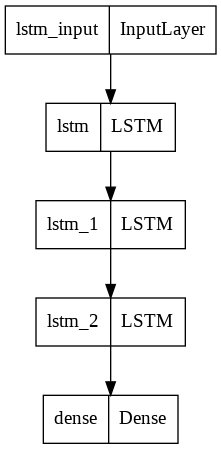

In [ ]:
tf.keras.utils.plot_model(model)

## Predizione su stock a scelta

In [ ]:
stock = tickerDict['utilities'][0]

In [ ]:
start_test_date = '2020-01-01'
end_test_date = '2021-12-31'

In [ ]:
tickerDf = yf.download(stock, start=start_test_date, end=end_test_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data, target, pred, pred_update, RMS_error, RMS_error_update = model_lstm.predict_values_for_stock(stock, start_date=start_test_date, end_date=end_test_date)

[*********************100%***********************]  1 of 1 completed
Normalizzazione dei dati
Preprocessing dei dati
Predizione dei dati
Shape di xtest passato al predict = (444, 60, 1)


In [ ]:
target.shape, pred.shape, pred_update.shape

((444,), (444, 1), (444, 1))

In [ ]:
pred = np.reshape(pred, -1)

In [ ]:
pred_update = np.reshape(pred_update, -1)

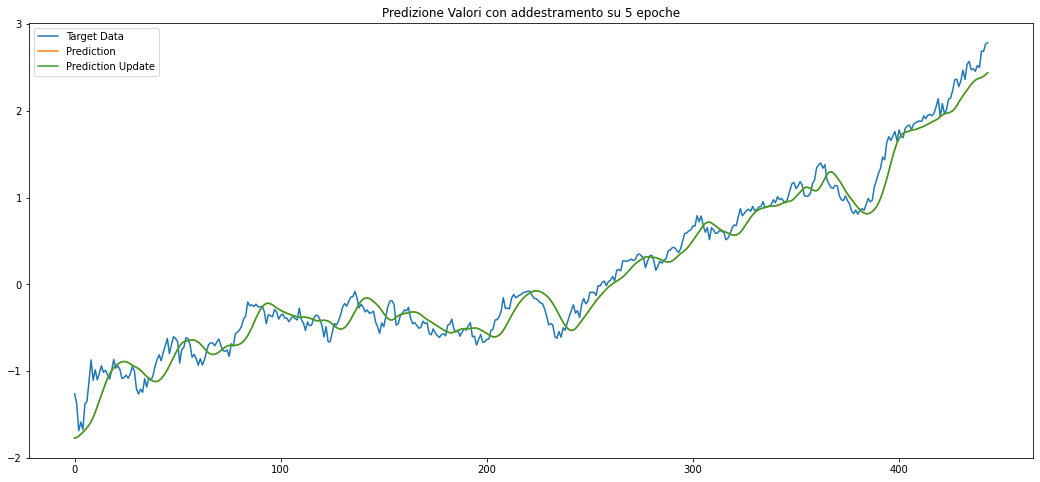

In [ ]:
plt.figure(figsize=(18,8))
plt.title(label='Predizione Valori con addestramento su 5 epoche')
plt.plot(pd.Series(target), label='Target Data')
plt.plot(pd.Series(pred), label='Prediction')
plt.plot(pd.Series(pred_update), label='Prediction Update')
plt.legend()

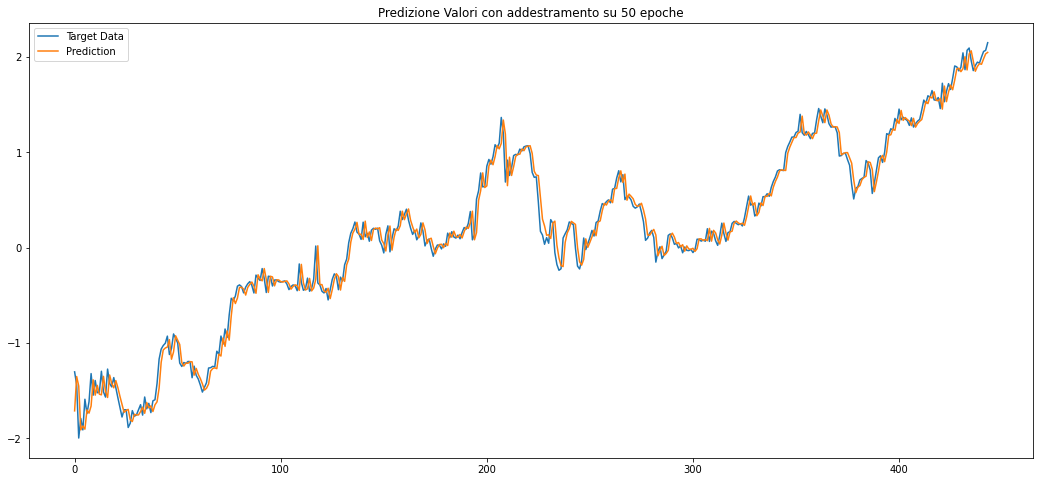

In [ ]:
plt.figure(figsize=(18,8))
plt.title(label='Predizione Valori con addestramento su 50 epoche')
plt.plot(pd.Series(target), label='Target Data')
plt.plot(pd.Series(pred), label='Prediction')
#plt.plot(pd.Series(pred_update), label='Prediction Update')
plt.legend()

In [ ]:
tickerDf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,60.492500,60.919998,59.487499,59.654999,56.409409,7884800
2020-01-03,59.657501,60.340000,59.535000,60.080002,56.811279,7097200
2020-01-06,60.174999,60.650002,60.105000,60.380001,57.094963,5518800
2020-01-07,60.172501,60.552502,60.042500,60.327499,57.045319,6653200
2020-01-08,60.417500,60.737499,60.250000,60.299999,57.019318,5936000


In [ ]:
#tickerDf['close Norm'] = (tickerDf['Adj Close'] - tickerDf['Adj Close'].mean() ) / tickerDf['Adj Close'].std() 
tickerDf['close Norm'] = (tickerDf['Close'] - tickerDf['Close'].mean() ) / tickerDf['Close'].std() 
tickerDf['open Norm'] = (tickerDf['Open'] - tickerDf['Open'].mean() ) / tickerDf['Open'].std()

In [ ]:
tickerDf

,Open,High,Low,Close,Adj Close,Volume,close Norm,open Norm
Date,,,,,,,,
2020-01-02,60.492500,60.919998,59.487499,59.654999,56.409409,7884800,-1.498642,-1.397936
2020-01-03,59.657501,60.340000,59.535000,60.080002,56.811279,7097200,-1.452092,-1.488957
2020-01-06,60.174999,60.650002,60.105000,60.380001,57.094963,5518800,-1.419233,-1.432546
2020-01-07,60.172501,60.552502,60.042500,60.327499,57.045319,6653200,-1.424983,-1.432818
2020-01-08,60.417500,60.737499,60.250000,60.299999,57.019318,5936000,-1.427995,-1.406111
...,...,...,...,...,...,...,...,...
2021-12-23,90.680000,91.309998,90.400002,90.699997,89.256691,5845600,1.901724,1.892730
2021-12-27,90.849998,91.349998,90.629997,91.320000,89.866829,5410300,1.969633,1.911261
2021-12-28,91.660004,92.190002,91.510002,91.879997,90.417915,3096400,2.030970,1.999557


In [ ]:
tickerDf.reset_index().iloc[60:]

,Date,Open,High,Low,Close,Adj Close,Volume,close Norm,open Norm
60,2020-03-30,36.439999,37.500000,35.770000,36.779999,31.533272,3966400,-1.058037,-1.129979
61,2020-03-31,38.330002,38.869999,36.650002,37.240002,31.927650,5090000,-0.981230,-0.811866
62,2020-04-01,38.349998,39.240002,37.270000,37.480000,32.133419,4019800,-0.941157,-0.808500
63,2020-04-02,40.119999,41.119999,38.419998,39.720001,34.053879,4921100,-0.567142,-0.510585
64,2020-04-03,36.730000,36.930000,35.230000,35.669998,30.581612,3760100,-1.243375,-1.081168
...,...,...,...,...,...,...,...,...,...
499,2021-12-23,50.980000,51.330002,50.919998,51.080002,48.983864,1046700,1.329650,1.317301
500,2021-12-27,50.669998,51.060001,50.459999,51.009998,48.916729,1149900,1.317962,1.265124
501,2021-12-28,51.160000,51.320000,50.939999,51.220001,49.118114,1031500,1.353026,1.347598
502,2021-12-29,50.779999,51.209999,50.669998,50.970001,48.878372,1472500,1.311283,1.283638


In [ ]:
tickerDf_tested = tickerDf.iloc[60:].reset_index()

In [ ]:
tickerDf_tested['original target'] = target
tickerDf_tested['predicted'] = pred

In [ ]:
#aggiungo la colonna delle decisioni del bot
# se open Norm > predicted --> buy
tickerDf_tested['bot decision'] = np.where(tickerDf_tested['open Norm'] < tickerDf_tested['predicted'], 'buy', 'sell')

In [ ]:
tickerDf_tested

,Date,Open,High,Low,Close,Adj Close,Volume,close Norm,open Norm,original target,predicted,bot decision
0,2020-03-30,59.327499,62.057499,58.590000,61.502499,58.460110,16373600,-1.296285,-1.524930,-1.302082,-1.711418,sell
1,2020-03-31,60.527500,61.974998,59.790001,60.154999,57.179272,18899200,-1.443877,-1.394121,-1.436835,-1.350903,buy
2,2020-04-01,57.740002,57.997501,53.259998,54.557499,51.858665,13691200,-2.056973,-1.697979,-1.996595,-1.451162,buy
3,2020-04-02,53.750000,57.384998,53.535000,56.612499,53.812016,9234400,-1.831888,-2.132919,-1.791091,-1.910980,buy
4,2020-04-03,55.990002,57.142502,54.384998,55.410000,52.668991,8755600,-1.963598,-1.888742,-1.911343,-1.870007,buy
...,...,...,...,...,...,...,...,...,...,...,...,...
439,2021-12-23,90.680000,91.309998,90.400002,90.699997,89.256691,5845600,1.901724,1.892730,1.937908,1.932320,buy
440,2021-12-27,90.849998,91.349998,90.629997,91.320000,89.866829,5410300,1.969633,1.911261,2.002098,1.925623,buy
441,2021-12-28,91.660004,92.190002,91.510002,91.879997,90.417915,3096400,2.030970,1.999557,2.060076,1.982875,sell
442,2021-12-29,91.949997,92.260002,91.589996,91.989998,90.526169,2945400,2.043018,2.031169,2.071465,2.035063,buy


In [ ]:
tickerDf_buy = tickerDf_tested.loc[tickerDf_tested['bot decision'] == 'buy',['Date', 'Open', 'Close', 'Adj Close', 'bot decision']]
tickerDf_sell = tickerDf_tested.loc[tickerDf_tested['bot decision'] == 'sell',['Date', 'Open', 'Close', 'Adj Close', 'bot decision']]

In [ ]:
# se buy allora compro a inizio giornata a prezzo Open e chiudo a fine giornata con Adj Close
# profitto allora Adj Close - Buy
tickerDf_buy['profit'] = tickerDf_buy['Close'] - tickerDf_buy['Open']
# se sell significa che scommetto contro l'andamento positivo del titolo
# profitto allora Open - Close
tickerDf_sell['profit'] = tickerDf_sell['Open'] - tickerDf_sell['Adj Close']

In [ ]:
tickerDf_sell

,Date,Open,Close,Adj Close,bot decision,profit
0,2020-03-30,59.327499,61.502499,58.460110,sell,0.867390
5,2020-04-06,57.697498,58.627499,55.727329,sell,1.970169
6,2020-04-07,60.087502,57.122501,54.296783,sell,5.790718
7,2020-04-08,57.407501,58.375000,55.487324,sell,1.920177
8,2020-04-09,58.959999,61.320000,58.286640,sell,0.673359
...,...,...,...,...,...,...
427,2021-12-07,89.529999,90.410004,88.971321,sell,0.558678
428,2021-12-08,90.699997,90.320000,88.882744,sell,1.817253
437,2021-12-21,90.650002,90.449997,89.010674,sell,1.639328
441,2021-12-28,91.660004,91.879997,90.417915,sell,1.242088


In [ ]:
tickerDf_buy['profit'].sum()

1.1449165344238281

In [ ]:
tickerDf_sell['profit'].sum() 

600.1282081604004

In [ ]:
(tickerDf_buy['profit'].sum() + tickerDf_sell['profit'].sum() ) / tickerDf_tested['Open'].mean()

8.041712908099043

# Test completo su LSTM

In [ ]:
def calculate_investment(dataset ,initial_investment=1_000):
  '''
  Return the final value of investment
  '''
  open_close_prices = dataset[['Open', 'Close']]
  decisions = dataset['operation'] # if 1 -> buy, else sell
  total_cash = initial_investment
  price_decision = 1

  #creo il dizionario di analisi
  stats = {}
  stats['cash invested'] = []
  stats['Buy at'] = []
  stats['Close at'] = []
  stats['n stock buyed'] = []
  stats['Bot decision'] = []
  stats['cash returned'] = []



  # per le operazioni buy
  for i in open_close_prices.index:
    
    open_price = open_close_prices['Open'].loc[i]
    close_price = open_close_prices['Close'].loc[i]
    if(decisions.loc[i] == 1):
      #print(f'\nBuy {n_stock} stock for {open_price}')
      # a fine giornata chiudo la posizione aperta in precedenza
      price_decision = close_price
      price_open_operation = open_price
      #print(f'Close with return at {cash}')
    else:
      # se decision sell
      price_decision = open_price
      price_open_operation = close_price

    n_stock = total_cash / price_open_operation
    cash = n_stock * price_decision

    stats['cash invested'].append(total_cash)
    stats['Buy at'].append(open_price)
    stats['Close at'].append(close_price)
    stats['n stock buyed'].append(n_stock)
    stats['Bot decision'].append(decisions.loc[i])
    stats['cash returned'].append(cash)
    
    total_cash = cash


  return total_cash, stats


In [ ]:
tickerDict, _ = get_categorical_tickers()
tickerDict.pop('all')

In [ ]:
start_date_train = '2010-01-01'
end_date_train = '2019-12-31'

start_test_date = '2020-01-01'
end_test_date = '2022-01-01'

In [ ]:
dictionary_profits = {}
dictionary_profits['stock'] = []
dictionary_profits['list trained'] = [] #key
dictionary_profits['initial investment'] = [] 
dictionary_profits['gain'] = []
dictionary_profits['roi'] = []


for key in tickerDict.keys():
  # addestro sul paniere
  tickerSymbolList = tickerDict[key]
  model_lstm = LSTM_Model_MS(tickerSymbol=None, 
                           tickerSymbolList = tickerSymbolList , 
                           start=start_date_train, end = end_date_train, 
                           epochs=50, sameTickerTestTrain=True) 
  model_lstm.model_workflow()
  print(f'Addestramento Terminato su {tickerSymbolList}')

  # eseguo la predizione per ogni stock
  for k in tickerDict.keys():
    list_stocks = tickerDict[k][:3] # prendo solo i primi 5
    for stock in list_stocks:
      print(f'\n\nPredizione {stock} su paniere {key}')
      data, target, pred, pred_update, RMS_error, RMS_error_update = model_lstm.predict_values_for_stock(stock, start_date=start_test_date, end_date=end_test_date)
      pred = np.reshape(pred, -1)

      tickerDf = yf.download(stock, start=start_test_date, end=end_test_date)
      #tickerDf['close Norm'] = (tickerDf['Adj Close'] - tickerDf['Adj Close'].mean() ) / tickerDf['Adj Close'].std() 
      tickerDf['close Norm'] = (tickerDf['Close'] - tickerDf['Close'].mean() ) / tickerDf['Close'].std() 
      tickerDf['open Norm'] = (tickerDf['Open'] - tickerDf['Open'].mean() ) / tickerDf['Open'].std()

      tickerDf_tested = tickerDf.iloc[60:].reset_index()
      tickerDf_tested['original target'] = target
      tickerDf_tested['predicted'] = pred  
      tickerDf_tested['operation'] = np.where(tickerDf_tested['open Norm'] < tickerDf_tested['predicted'], 1, 0) 

      initial_investment = tickerDf_tested.iloc[0]['Open']
      tot, stats = calculate_investment(tickerDf_tested, initial_investment=initial_investment)

      roi = (tot-initial_investment)/initial_investment

      # divido i dataset buy e sell
      '''
      tickerDf_buy = tickerDf_tested.loc[tickerDf_tested['bot decision'] == 'buy',['Date', 'Open', 'Close', 'Adj Close', 'bot decision']]
      tickerDf_sell = tickerDf_tested.loc[tickerDf_tested['bot decision'] == 'sell',['Date', 'Open', 'Close', 'Adj Close', 'bot decision']]   

      tickerDf_buy['profit'] = tickerDf_buy['Adj Close'] - tickerDf_buy['Open']
      tickerDf_sell['profit'] = tickerDf_sell['Open'] - tickerDf_sell['Adj Close']
      buy_on_adj_close = tickerDf_buy['profit'].sum()
      sell_on_adj_close = tickerDf_sell['profit'].sum()
      print(f'Profit Buy = Adj close - Open --> {buy_on_adj_close}')
      print(f'Profit Sell = Open - Adj Close --> {sell_on_adj_close}')

      tickerDf_buy['profit'] = tickerDf_buy['Close'] - tickerDf_buy['Open']
      tickerDf_sell['profit'] = tickerDf_sell['Open'] - tickerDf_sell['Close']
      buy_on_close = tickerDf_buy['profit'].sum()
      sell_on_close = tickerDf_sell['profit'].sum()
      print(f'Profit Buy = Close - Open --> {buy_on_close}')
      print(f'Profit Sell = Open - Close --> {sell_on_close}')
      '''
      #riempio il dizionario
      dictionary_profits['stock'].append(stock)
      dictionary_profits['list trained'].append(key)
      dictionary_profits['initial investment'].append(initial_investment) 
      dictionary_profits['gain'].append(tot)
      dictionary_profits['roi'].append(roi)
      #dictionary_profits['profit buy on Close'].append(buy_on_close)
      #dictionary_profits['profit buy on Adj Close'].append(buy_on_adj_close)
      #dictionary_profits['profit sell on Close'].append(sell_on_close)
      #dictionary_profits['profit sell on Adj Close'].append(sell_on_adj_close)



In [ ]:
pd.DataFrame(dictionary_profits).sort_values(by='roi').tail(20)

In [ ]:
df_stats = pd.DataFrame(dictionary_profits).sort_values(by='roi')

In [ ]:
df_stats.to_csv('df_energy_to_financials.csv')

In [ ]:
profits_from_energy_to_staples = pd.DataFrame(dictionary_profits)

In [ ]:
profits_from_energy_to_staples.to_csv('profits_from_energy_to_staples.csv')

# Calcolo ROI su tutti i test

In [1]:
csv_list = ['df_energy_to_financials.csv', 'profits_estate.csv', 'profits_from_IT_communication.csv', 'profits_from_discretionary_to_staples.csv']

In [7]:
list_df = []
for f in csv_list:
  list_df.append(pd.read_csv(f))

In [9]:
df_complete = pd.concat(list_df)

In [14]:
df_complete.sort_values(by='roi', ascending=False).head(15)

,Unnamed: 0,stock,list trained,initial investment,gain,roi
45,45,UNH,staples,242.639999,606.625224,1.500104
197,144,UNH,healthcare,242.639999,554.191742,1.284008
28,28,DIS,estate,96.000000,215.913163,1.249095
196,12,UNH,energy,242.639999,531.221968,1.189342
195,152,HD,healthcare,190.570007,413.922390,1.172023
194,32,CCI,energy,140.500000,294.192107,1.093894
193,111,UNH,utilities,242.639999,502.645557,1.071569
192,76,DUK,industrials,81.349998,165.941942,1.039852
191,45,UNH,materials,242.639999,493.344882,1.033238
47,47,PFE,staples,29.459204,59.749784,1.028221
